In [1]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import time
from sklearn import metrics
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier

# uploading the Data

In [2]:
Folder = 'C:/Users/Dikla/Desktop/train/'

dog_train = [Folder+ dog for dog in os.listdir(Folder) if 'dog' in dog]
cat_train = [Folder+ cat for cat in os.listdir(Folder) if 'cat' in cat]

# show a sample of the gray scale images we'll work on first.

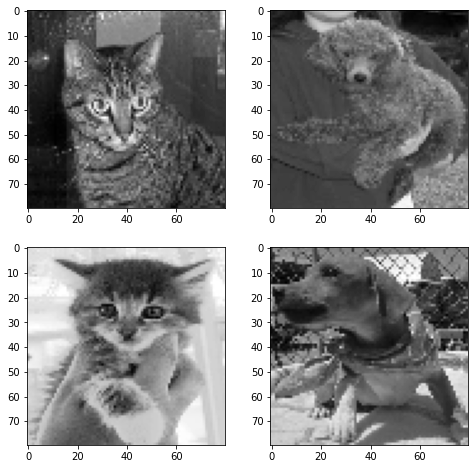

In [3]:
main_dir = "C:/Users/Dikla/Desktop/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

fig = plt.figure(figsize=(8, 8))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
p = os.listdir(path)[1]
img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")

fig.add_subplot(rows, columns, 2)

g = os.listdir(path)[19001]
img_array = cv2.imread(os.path.join(path,g),cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")

fig.add_subplot(rows, columns, 3)

a = os.listdir(path)[3]
img_array = cv2.imread(os.path.join(path,a),cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")

fig.add_subplot(rows, columns, 4)

b = os.listdir(path)[20000]
img_array = cv2.imread(os.path.join(path,b),cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")

# making all images to gray scale 2D arrays

#### puting all images in list so we can transform to a dataframe

In [4]:
#dog_lists
img_array = cv2.imread(dog_train[0],cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array, dsize=(80, 80))
img_array = img_array.ravel()
list_dog = pd.DataFrame(img_array)
for i in range (0, len(dog_train)):
    img_array = cv2.imread(dog_train[i],cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, dsize=(80, 80))
    img_array = img_array.ravel()
    list_dog[i] = img_array

### showing how the DF looks now

In [5]:
list_dog = list_dog.T
list_dog

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,118,117,163,161,163,133,138,122,132,137,...,87,82,74,76,81,74,73,72,74,82
1,129,132,131,97,90,83,99,84,112,120,...,244,246,242,246,247,246,241,237,235,235
2,116,105,102,100,125,122,121,125,124,126,...,36,40,82,95,97,92,93,96,91,93
3,185,186,184,182,182,181,188,185,180,181,...,50,57,71,62,83,84,59,73,69,70
4,16,8,10,15,59,45,95,46,71,20,...,123,134,102,113,114,105,124,121,120,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,140,143,144,146,147,148,148,149,150,152,...,164,164,164,165,167,166,168,168,168,169
12496,106,78,112,98,120,57,107,76,71,61,...,79,84,101,91,95,81,79,75,97,74
12497,35,36,63,69,41,51,48,47,44,64,...,130,119,136,139,98,83,113,96,114,174
12498,255,249,237,223,202,167,121,72,61,72,...,114,97,109,115,104,103,125,110,109,120


#### puting all images in list so we can transform to a dataframe

In [6]:
#cat_lists
img_array = cv2.imread(cat_train[0],cv2.IMREAD_GRAYSCALE)
img_array = cv2.resize(img_array, dsize=(80, 80))
img_array = img_array.ravel()
list_cat = pd.DataFrame(img_array)
for i in range (0, len(cat_train)):
    img_array = cv2.imread(cat_train[i],cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, dsize=(80, 80))
    img_array = img_array.ravel()
    list_cat[i] = img_array

### showing how the DF looks now

In [7]:
list_cat = list_cat.T
list_cat

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,169,174,180,184,188,191,196,198,201,203,...,3,3,3,3,2,2,2,2,2,2
1,43,43,58,45,35,28,40,52,37,41,...,38,39,44,53,59,57,70,71,47,33
2,42,38,45,46,58,57,54,59,48,51,...,88,126,156,165,137,135,149,162,171,154
3,220,224,225,230,223,228,230,225,228,227,...,236,232,228,204,204,203,216,221,212,213
4,114,120,115,88,96,139,127,185,130,196,...,105,101,91,95,92,97,120,89,96,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,24,23,21,21,21,20,19,20,20,21,...,67,73,78,72,78,71,83,78,64,78
12496,102,96,93,92,92,91,99,99,91,91,...,107,105,104,104,103,103,101,100,101,100
12497,96,95,98,95,105,95,94,99,115,137,...,255,255,254,254,254,254,254,254,254,254
12498,57,51,67,140,153,158,159,160,161,162,...,205,207,197,197,207,216,225,224,217,216


### We want to add labels so we can later to the train-test split and drop the label column for it.
#### 0- for dogs
#### 1- for cats

In [8]:
list_dog['label'] = 0
list_cat['label'] = 1

### now we are merging this 2 listd to one DataFrame so we can continue the preprocessing. we'll merge this 2 lists using 'concat'.

In [9]:
df0 = pd.concat([list_dog, list_cat],ignore_index = True)

In [10]:
df0

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,label
0,118,117,163,161,163,133,138,122,132,137,...,82,74,76,81,74,73,72,74,82,0
1,129,132,131,97,90,83,99,84,112,120,...,246,242,246,247,246,241,237,235,235,0
2,116,105,102,100,125,122,121,125,124,126,...,40,82,95,97,92,93,96,91,93,0
3,185,186,184,182,182,181,188,185,180,181,...,57,71,62,83,84,59,73,69,70,0
4,16,8,10,15,59,45,95,46,71,20,...,134,102,113,114,105,124,121,120,116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24,23,21,21,21,20,19,20,20,21,...,73,78,72,78,71,83,78,64,78,1
24996,102,96,93,92,92,91,99,99,91,91,...,105,104,104,103,103,101,100,101,100,1
24997,96,95,98,95,105,95,94,99,115,137,...,255,254,254,254,254,254,254,254,254,1
24998,57,51,67,140,153,158,159,160,161,162,...,207,197,197,207,216,225,224,217,216,1


## checking for any duplicates in the total DataFrame

In [11]:
df1 = df0.drop_duplicates()
df1

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,label
0,118,117,163,161,163,133,138,122,132,137,...,82,74,76,81,74,73,72,74,82,0
1,129,132,131,97,90,83,99,84,112,120,...,246,242,246,247,246,241,237,235,235,0
2,116,105,102,100,125,122,121,125,124,126,...,40,82,95,97,92,93,96,91,93,0
3,185,186,184,182,182,181,188,185,180,181,...,57,71,62,83,84,59,73,69,70,0
4,16,8,10,15,59,45,95,46,71,20,...,134,102,113,114,105,124,121,120,116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24,23,21,21,21,20,19,20,20,21,...,73,78,72,78,71,83,78,64,78,1
24996,102,96,93,92,92,91,99,99,91,91,...,105,104,104,103,103,101,100,101,100,1
24997,96,95,98,95,105,95,94,99,115,137,...,255,254,254,254,254,254,254,254,254,1
24998,57,51,67,140,153,158,159,160,161,162,...,207,197,197,207,216,225,224,217,216,1


## checking for NaN. Because the data contains only images we have no expectations of any NaN, but we'll check anyway

In [12]:
df1.isna().sum().sum()

0

# Spliting the data

In [13]:
X = df1.drop(['label'],axis = 1)
y = df1.label

In [14]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### we want to reset all indexes so we can split the data again

In [86]:
#reset index again
X_train_2 = X_train_2.reset_index()
X_train_2 = X_train_2.drop(['index'], axis = 1)

y = y_train_2.reset_index()
y = y.drop(['index'], axis = 1)

X_test_2 = X_test_2.reset_index()
X_test_2 = X_test_2.drop(['index'], axis = 1)

# split again
### because we have no labels on the origin test, we'll split the data again for valisation later on.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
y_train = y_train.values.ravel() # Transforming dataframe to 1Darry

# PCA
### PCA- principal component analysis, is an algorithm that can explain wich precent of the data we can explain with the minimal amount of dimentions. PCA is a dimensionality reduction technique, which is in fact linear transformations applied on (usually) highly correlated multidimensional data. The input dimensions are transformed in a new coordinate system in which the produced dimensions contain, in decreasing order, the greatest variance related with unchanged landscape features. PCA will drop the accuracy slightly because we lower the dimentions so we can still explain 95% of the data. However, we take into consideraition that usually we'll get maximum 95% of the data, so it makes sence will loose a little bit of the accuracy while working.

### how mant dimentions will give us 95% of the data ?

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95) 
print (d)

1006


### we can see that we can use 959 dimentions instead of 6,000 and still explain 95% of the variance

Text(0, 0.5, 'Explained Variance')

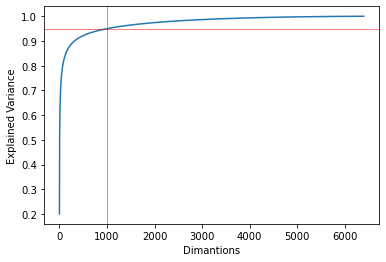

In [19]:
plt.plot(cumsum)
plt.axhline(y=0.95 , linewidth = 0.5 , color = 'r');
plt.axvline(x=d , linewidth = 0.5 , color = 'r');
plt.xlabel("Dimantions")
plt.ylabel("Explained Variance")

# Scaling
### We need to normalized the data to be all values between 0-1 (normal distribution) so the model will not be "confused" by bigger numbers that have no significent effect on the labels. In pictures we have pixels between 0 to 255 , so we want a normalization of all the data for better results.

In [20]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = pd.DataFrame(scaler.transform(X_test.values))

# Models

### We will not do Dummy Classifier this time, the dummy should giva us about 50% accuracy because we have 2 different classes which mean 2 different categories that are mostly balanced - cats and dogs. we have 12,500 dog's pictures and 12,500 cat's pictures. Usually we'll use Dummy classifier for comperation to our models . We understand the Dummy should give us 50 % accuracy so we'll skip that step.

# PCA implementaion

In [21]:
pca = PCA(n_components = 0.95)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))

# KNN

### KNN is a model who works by nearset neighbors.The model 'looks' at the nearest neighbors calssification which will be the best parameter to decide which type-dog or cat is the most accurate for this new given picture. We can decied how many neighbors to check by the parameter = K which represents the scope of the search. also we can do some testing to see which K will gives us the best results. 

In [22]:
knnpca = KNeighborsClassifier()
knnpca.fit(X_train_reduced,y_train)

KNeighborsClassifier()

In [39]:
#knnpca
from sklearn.metrics import accuracy_score
pred = knnpca.predict(X_test_reduced)
knn_acuracy_gray = accuracy_score(y_test,y_pred)
print(knn_acuracy_gray )

0.5683920980245061


### In this case KNN is not effetive at all. we have 56% of accuracy which means about 50% of the data the model couldnt identify.

# Random Forest

### Random Forest model base on decision trees. this model has the ability to know which feature contains the most significant information. it "runs" on all features and tests which feature manages to divide the data to the most accurate division percentages. Random Forest model builds many decision trees for all features, and any new picture we need to calssify, will be applied on all these trees until it makes a decision which lable it is.

In [24]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [27]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test_reduced)
randomforest_acuracy_gray = accuracy_score(y_test,y_pred)
print(randomforest_acuracy_gray )

0.5688922230557639


### In this case RandomForest is a little bit better then the KNN model. we have 58% of accuracy which means about almost 50% of the data the model couldnt identify.

# Voting

### voting model divided into hard voting and soft voting. as its name- this model makes a voting among all the models we have preformed and takes the highest score of them. the soft voting refer to the probabillity while the hard voting performs a simple vote between the models and takes the highest.

In [28]:
gnb = GaussianNB()
lr = LogisticRegression()

In [29]:
voting = VotingClassifier(estimators = [('knn',knnpca),("RF",clf),('gaussian-bayes',gnb)])

In [30]:
voting.fit(X_train_reduced,y_train)
pred = voting.predict(X_test_reduced)
voting_acuracy_gray = accuracy_score(y_test,y_pred)
print(voting_acuracy_gray )

0.5688922230557639


### In this case Voting has lower accuracy then Random Forest. we got 57% accuracy.

# Bagging and Pasting
### Bagging and pasting - bootstrap aggregating , is a an algorithm which uses the same traning algorithm for evety predictor, but to train them on different random subsets of traning set. when sampling is performed with replacement, this method is called bagging. when sampling is performed without replacment it is called pasting.

#### The Bagging classifier aoutomatically performs soft voting instead of hard voting if the base classifier cam estimate class probabilities.
##### we'll try  Bagging first, and then we'll try again with pastin and see the results

In [26]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train_reduced , y_train)
y_pred = bag_clf.predict(X_test_reduced)
bagging_acuracy_gray = accuracy_score(y_test,y_pred)
print(bagging_acuracy_gray )

0.5688922230557639


In [31]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train_reduced , y_train)
y_pred = bag_clf1.predict(X_test_reduced)
pasting_acuracy_gray = accuracy_score(y_test,y_pred)
print(pasting_acuracy_gray )

0.5683920980245061


### We can see pasting did slightly better, but there is no sagnificant results between this two. As the other models we did so far the accuracy is around 57%.

# XGBoost
### To explain what XGBboost is we need first to understand what GradientBoost is. GradientBoosting soupports a subsample hyperparameter, which specifies the fraction of training instances to be used for training each tree. This trades a higher bias for a lower variance. it also speeds up traning considerably. after understanding what GradientBoost means, we can explaine what XGBoost means. XGBoost -Extreame Gradient Boosting is an optimized implementation of Gradient Boosting. it aims at being extreamly fast, scalable and portable. 

In [32]:
xgb_clf = xgboost.XGBClassifier(n_estimators = 2000,learning_rate = 0.05,use_label_encoder = False, eval_metric = "merror")

In [33]:
xgb_clf.fit(X_train_reduced,y_train)
pred = xgb_clf.predict(X_test_reduced)
xgb_acuracy_gray = accuracy_score(y_test,y_pred)
print(xgb_acuracy_gray )

0.5683920980245061


## Lets summerize so far

### As expected, XGBoost has the best rasults of all models so far, with 64% accuracy.

# AdaBoost
### AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [34]:
ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train_reduced, y_train)
pred = ada_clf.predict(X_test_reduced)
ada_acuracy_gray = accuracy_score(y_test,y_pred)
print(ada_acuracy_gray )

0.5683920980245061


In [40]:
total_models_gray = pd.DataFrame (np.array([['xgboost' ,xgb_acuracy_gray], ['AdaBoost',ada_acuracy_gray], ['RandomForest' ,randomforest_acuracy_gray],['voting' ,voting_acuracy_gray], ['pasting',pasting_acuracy_gray], ['baging' ,bagging_acuracy_gray], ['KNN' ,knn_acuracy_gray]]),
                   columns=['Model', 'Accuracy'])
total_models_gray

,Model,Accuracy
0,xgboost,0.5683920980245061
1,AdaBoost,0.5683920980245061
2,RandomForest,0.5688922230557639
3,voting,0.5688922230557639
4,pasting,0.5683920980245061
5,baging,0.5688922230557639
6,KNN,0.5683920980245061


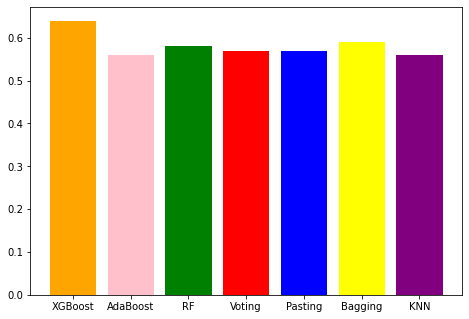

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
langs = ['XGBoost', 'AdaBoost', 'RF', 'Voting', 'Pasting', 'Bagging', 'KNN']
accuracy = [0.64,0.56,0.58,0.57,0.57,0.59,0.56]
ax.bar(langs,accuracy)
height = [0.64,0.56,0.58,0.57,0.57,0.59,0.56]
bars = ('XGBoost', 'AdaBoost', 'RF', 'Voting', 'Pasting', 'Bagging', 'KNN')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['orange', 'pink', 'green', 'red', 'blue', 'yellow', 'purple'])

plt.show()

# Color Images

## We will do all preprocessing again on Color scale to see if we'll get any different results

In [42]:
   # img_array1 = img_array1.reshape((img_array1.shape[0]*img_array1.shape[1]), img_array1.shape[2])# 3D to 2D array
    #img_array1 = img_array1.transpose()# 3D to 2D array

# show a sample of the color images we'll work on for now.

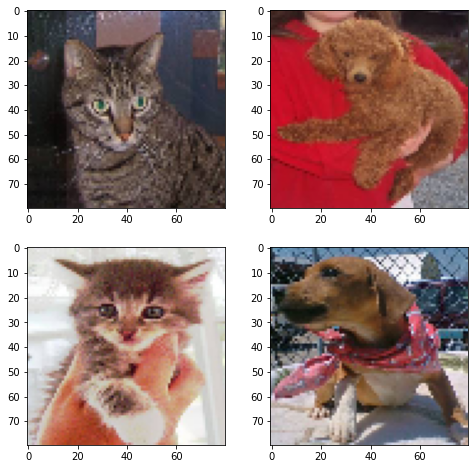

In [43]:
main_dir = "C:/Users/Dikla/Desktop/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

#plt.axis("off")
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#plt.show()

fig = plt.figure(figsize=(8, 8))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
p = os.listdir(path)[1]
img_array = cv2.imread(os.path.join(path,p),cv2.COLOR_BGR2RGB)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(cv2.cvtColor(new_img_array, cv2.COLOR_BGR2RGB))

fig.add_subplot(rows, columns, 2)

g = os.listdir(path)[19001]
img_array = cv2.imread(os.path.join(path,g),cv2.COLOR_BGR2RGB)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(cv2.cvtColor(new_img_array, cv2.COLOR_BGR2RGB))

fig.add_subplot(rows, columns, 3)

a = os.listdir(path)[3]
img_array = cv2.imread(os.path.join(path,a),cv2.COLOR_BGR2RGB)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(cv2.cvtColor(new_img_array, cv2.COLOR_BGR2RGB))

fig.add_subplot(rows, columns, 4)

b = os.listdir(path)[20000]
img_array = cv2.imread(os.path.join(path,b),cv2.COLOR_BGR2RGB)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(cv2.cvtColor(new_img_array, cv2.COLOR_BGR2RGB))

# making all images to 2D arrays

#### puting all images in list so we can transform to a dataframe

In [44]:
#dog_lists
img_array = cv2.imread(dog_train[0],cv2.IMREAD_COLOR)
img_array = cv2.resize(img_array, dsize=(50, 50))
img_array = img_array.ravel()
list_dog = pd.DataFrame(img_array)
for i in range (0, len(dog_train)):
    img_array = cv2.imread(dog_train[i],cv2.IMREAD_COLOR)
    img_array = cv2.resize(img_array, dsize=(50, 50))
    img_array = img_array.ravel()
    list_dog[i] = img_array

### showing how the DF looks now

In [45]:
list_dog = list_dog.T
list_dog

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,122,108,110,163,161,161,163,158,157,141,...,69,80,78,68,85,80,71,83,78,69
1,58,94,135,57,95,139,35,58,81,49,...,249,227,244,247,213,236,238,214,236,234
2,55,108,139,50,99,134,95,117,127,100,...,100,81,96,99,83,95,101,80,92,98
3,179,185,196,175,181,192,171,176,191,173,...,80,56,68,86,50,62,80,57,63,83
4,14,13,15,3,6,13,55,40,47,51,...,132,113,121,138,106,114,131,105,113,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,107,144,148,110,147,151,113,150,154,114,...,178,132,168,178,134,169,179,135,170,180
12496,53,81,111,63,88,114,44,76,95,43,...,114,50,76,99,66,97,118,37,64,85
12497,45,48,53,50,53,58,51,53,54,41,...,111,134,175,213,27,76,117,126,171,217
12498,253,252,253,229,230,253,175,189,235,92,...,95,98,98,114,97,95,110,107,107,121


#### puting all images in list so we can transform to a dataframe

In [46]:
#cat_lists
img_array = cv2.imread(cat_train[0],cv2.IMREAD_COLOR)
img_array = cv2.resize(img_array, dsize=(50, 50))
img_array = img_array.ravel()
list_cat = pd.DataFrame(img_array)
for i in range (0, len(cat_train)):
    img_array = cv2.imread(cat_train[i],cv2.IMREAD_COLOR)
    img_array = cv2.resize(img_array, dsize=(50, 50))
    img_array = img_array.ravel()
    list_cat[i] = img_array

### showing how the DF looks now

In [47]:
list_cat = list_cat.T
list_cat

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,92,169,208,100,177,216,104,182,225,110,...,2,0,2,2,0,2,2,0,2,2
1,43,43,39,64,58,55,36,40,35,44,...,71,47,53,70,52,57,75,20,26,39
2,53,45,38,61,47,41,64,54,47,69,...,166,52,150,165,2,183,185,10,183,187
3,217,222,221,220,225,224,237,235,235,239,...,205,208,210,210,218,220,219,207,212,215
4,72,109,137,83,120,148,48,87,115,90,...,96,82,105,120,59,91,102,64,90,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,24,24,24,23,23,23,20,20,20,21,...,77,77,78,78,73,73,73,71,71,71
12496,114,102,94,104,92,84,102,95,79,112,...,117,100,95,116,98,93,114,101,95,116
12497,114,94,93,116,96,95,123,102,102,113,...,253,254,255,253,254,255,253,254,255,253
12498,56,56,62,54,56,58,152,151,137,163,...,199,226,217,209,238,226,216,236,223,209


### We want to add labels so we can later to the train-test split and drop the label column for it.
#### 0- for dogs
#### 1- for cats

In [48]:
list_dog['label'] = 0
list_cat['label'] = 1

### now we are merging this 2 listd to one DataFrame so we can continue the preprocessing. we'll merge this 2 lists using 'concat'.

In [49]:
df01 = pd.concat([list_dog, list_cat],ignore_index = True)

In [50]:
df01

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,label
0,122,108,110,163,161,161,163,158,157,141,...,80,78,68,85,80,71,83,78,69,0
1,58,94,135,57,95,139,35,58,81,49,...,227,244,247,213,236,238,214,236,234,0
2,55,108,139,50,99,134,95,117,127,100,...,81,96,99,83,95,101,80,92,98,0
3,179,185,196,175,181,192,171,176,191,173,...,56,68,86,50,62,80,57,63,83,0
4,14,13,15,3,6,13,55,40,47,51,...,113,121,138,106,114,131,105,113,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24,24,24,23,23,23,20,20,20,21,...,77,78,78,73,73,73,71,71,71,1
24996,114,102,94,104,92,84,102,95,79,112,...,100,95,116,98,93,114,101,95,116,1
24997,114,94,93,116,96,95,123,102,102,113,...,254,255,253,254,255,253,254,255,253,1
24998,56,56,62,54,56,58,152,151,137,163,...,226,217,209,238,226,216,236,223,209,1


## checking for any duplicates in the total DataFrame

In [51]:
df02 = df01.drop_duplicates()
df02

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,label
0,122,108,110,163,161,161,163,158,157,141,...,80,78,68,85,80,71,83,78,69,0
1,58,94,135,57,95,139,35,58,81,49,...,227,244,247,213,236,238,214,236,234,0
2,55,108,139,50,99,134,95,117,127,100,...,81,96,99,83,95,101,80,92,98,0
3,179,185,196,175,181,192,171,176,191,173,...,56,68,86,50,62,80,57,63,83,0
4,14,13,15,3,6,13,55,40,47,51,...,113,121,138,106,114,131,105,113,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24,24,24,23,23,23,20,20,20,21,...,77,78,78,73,73,73,71,71,71,1
24996,114,102,94,104,92,84,102,95,79,112,...,100,95,116,98,93,114,101,95,116,1
24997,114,94,93,116,96,95,123,102,102,113,...,254,255,253,254,255,253,254,255,253,1
24998,56,56,62,54,56,58,152,151,137,163,...,226,217,209,238,226,216,236,223,209,1


## checking for NaN. Because the data contains only images we have no expectations of any NaN, but we'll check anyway

In [52]:
df02.isna().sum().sum()

0

# Spliting the data

In [53]:
X = df02.drop(['label'],axis = 1)
y = df02.label

In [54]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### we want to reset all indexes so we can split the data again

In [55]:
#reset index again
df = X_train_2.reset_index()
df = df.drop(['index'], axis = 1)

y = y_train_2.reset_index()
y = y.drop(['index'], axis = 1)

# split again
### because we have no labels on the origin test, we'll split the data again for valisation later on.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y, random_state=42)

In [57]:
y_train = y_train.values.ravel() # Transforming dataframe to 1Darry

In [58]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95) 
print (d)

957


### we can see that we can use 957 dimentions instead of over then 6,000 and still explain 95% of the variance

Text(0, 0.5, 'Explained Variance')

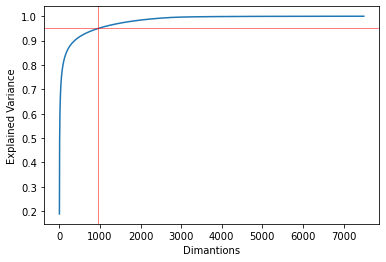

In [59]:
plt.plot(cumsum)
plt.axhline(y=0.95 , linewidth = 0.5 , color = 'r');
plt.axvline(x=d , linewidth = 0.5 , color = 'r');
plt.xlabel("Dimantions")
plt.ylabel("Explained Variance")

# scaling
### We need to normalized the data to be all values between 0-1 (normal distribution) so the model will not be "confused" by bigger numbers that have no significent affect on the labels. In pictures we have pixels between 0 to 255 , so we want a normalization of all the data for better results.

In [60]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = pd.DataFrame(scaler.transform(X_test.values))
X_test_2 = pd.DataFrame(scaler.transform(X_test_2.values))

# PCA
#### PCA will drop the accuracy slightly because we lower the dimentions so we can still explain 95% of the data. However, we take into consideraition that we'll get maximum 95% of the data, so it makes sence will loose a little bit of the accuracy while working.

In [61]:
pca = PCA(n_components = 0.95)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))
X_test_2_reduced = pd.DataFrame(pca.transform(X_test_2))

# KNN


In [62]:
knnpca = KNeighborsClassifier()
knnpca.fit(X_train_reduced,y_train)

KNeighborsClassifier()

In [63]:
#knnpca
pred = knnpca.predict(X_test_reduced)
knn_acuracy_color = accuracy_score(y_test,y_pred)
print(knn_acuracy_color )


0.5683920980245061


# Random Forest

In [64]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [65]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test_reduced)
RF_acuracy_color = accuracy_score(y_test,y_pred)
print(RF_acuracy_color )

0.5683920980245061


# Voting

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
gnb = GaussianNB()
lr = LogisticRegression()

In [67]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('knn',knnpca),("RF",clf),('gaussian-bayes',gnb)])

In [69]:
from sklearn.metrics import accuracy_score
voting.fit(X_train_reduced,y_train)
pred = voting.predict(X_test_reduced)
voting_acuracy_color = accuracy_score(y_test,y_pred)
print(voting_acuracy_color )

0.5683920980245061


# Bagging

In [70]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train_reduced , y_train)
y_pred = bag_clf.predict(X_test_reduced)
bagging_acuracy_color = accuracy_score(y_test,y_pred)
print(bagging_acuracy_color )

0.5908977244311078


# Pasting

In [71]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train_reduced , y_train)
y_pred = bag_clf1.predict(X_test_reduced)
pasting_acuracy_color = accuracy_score(y_test,y_pred)
print(pasting_acuracy_color )

0.5876469117279319


# XGBoost

In [90]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators = 1000,learning_rate = 0.5,use_label_encoder = False, eval_metric = "merror")

In [91]:
xgb_clf.fit(X_train_reduced,y_train)
pred = xgb_clf.predict(X_test_reduced)
xgb_acuracy_color = accuracy_score(y_test,y_pred)
print(xgb_acuracy_color )

0.5876469117279319


# Adaboost

In [74]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train_reduced, y_train)
pred = ada_clf.predict(X_test_reduced)
ada_acuracy_color = accuracy_score(y_test,y_pred)
print(ada_acuracy_color )

0.5876469117279319


In [76]:
total_models_color = pd.DataFrame (np.array([['xgboost' ,xgb_acuracy_color], ['AdaBoost',ada_acuracy_color], ['RandomForest' ,RF_acuracy_color],['voting' ,voting_acuracy_color], ['pasting',pasting_acuracy_color], ['bagging' ,bagging_acuracy_color], ['KNN' ,knn_acuracy_color]]),
                   columns=['Model', 'Accuracy'])
total_models_color

,Model,Accuracy
0,xgboost,0.5876469117279319
1,AdaBoost,0.5876469117279319
2,RandomForest,0.5683920980245061
3,voting,0.5683920980245061
4,pasting,0.5876469117279319
5,bagging,0.5908977244311078
6,KNN,0.5683920980245061


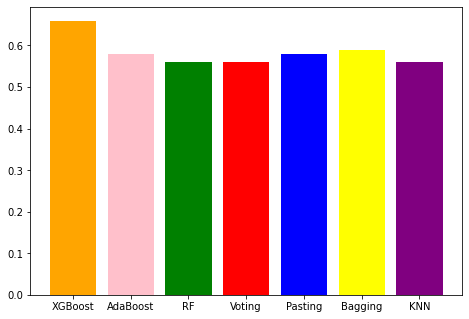

In [92]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
langs = ['XGBoost', 'AdaBoost', 'RF', 'Voting', 'Pasting', 'Bagging', 'KNN']
accuracy = [0.66,0.58,0.56,0.56,0.58,0.59,0.56]
ax.bar(langs,accuracy)
height = [0.66,0.58,0.56,0.56,0.58,0.59,0.56]
bars = ('XGBoost', 'AdaBoost', 'RF', 'Voting', 'Pasting', 'Bagging', 'KNN')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['orange', 'pink', 'green', 'red', 'blue', 'yellow', 'purple'])

plt.show()

In [ ]:
#X_test_2,y_test_2

In [89]:
xgb_clf.fit(X_train_reduced,y_train)
pred = xgb_clf.predict(X_test_2_reduced)
xgb_acuracy_color = accuracy_score(y_test_2,pred)
print(xgb_acuracy_color )

0.6563312662532507


## we can see we got 65% accuracy in our final test !

# conclusion
### PCA is an algorithm that can make us to get better results while we actually drop "unnecessery" dimentiond of the data we're working on. the meaning is we can still explain over 90% of the data well , but faster and more efficient by dimentionality reduction. As we can see, we tried many models after PCA , and checked them on gray scale and on color images to see what will give us the best score,  Each one of them reacted diffrently. Somtimes loosing 2% of the accuracy will be better for us if we made our model more efficient, so we'll need to calculate our "risks" and decide what is the best for us. We can see after PCA, the color images gave us slightly better results.